# Titanic 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
test_data = pd.read_csv("DataSet/test.csv")

In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data = pd.read_csv("DataSet/train.csv")

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.shape

(418, 11)

In [8]:
train_data.shape

(891, 12)

In [9]:
df = pd.concat([test_data, train_data])

In [10]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [11]:
df.shape

(1309, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [13]:
df['Name'].isnull().sum()

0

In [14]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [15]:
df.drop(['Name','Ticket','Fare'],inplace=True,axis=1)

In [16]:
categorical = df.columns[df.dtypes == 'object']
numerical = df.columns[df.dtypes != 'object']

In [17]:
categorical

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [18]:
numerical

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Survived'], dtype='object')

In [19]:
# Convert categorical data to numberical data 

In [20]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [21]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [22]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30',
       'C52', 'B28', 'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69',
       'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80',
       'A31', 'D36', 'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124

In [23]:
df['Cabin'] =df['Cabin'].fillna('Missing')

In [24]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [25]:
df['Cabin'].unique()

array(['M', 'B', 'E', 'A', 'C', 'D', 'F', 'G', 'T'], dtype=object)

In [26]:
numerical

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Survived'], dtype='object')

In [27]:
# Probability of who Survived concerning cabin

In [28]:
prob =  df.groupby(df['Cabin'])['Survived'].mean()

In [29]:
prob_data = pd.DataFrame(prob)

In [30]:
prob_data

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [31]:
prob_data['Not Survived'] = 1 - prob_data['Survived'] 

In [32]:
prob_data

,Survived,Not Survived
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [33]:
prob_data['Probability Rato'] = prob_data['Survived']/prob_data['Not Survived']

In [34]:
prob_data

,Survived,Not Survived,Probability Rato
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [35]:
categorical

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [36]:
df['Embarked'].unique()

array(['Q', 'S', 'C', nan], dtype=object)

In [37]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [38]:
df['Embarked'].isnull().sum()

0

In [79]:
numerical

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Survived'], dtype='object')

<Axes: xlabel='Pclass', ylabel='count'>

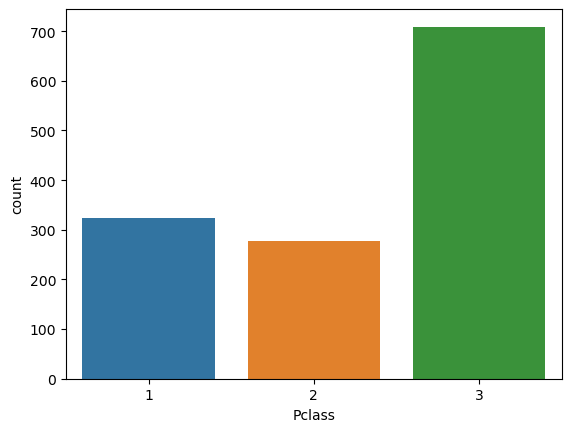

In [93]:
sns.countplot(data=df,x="Pclass")

<Axes: xlabel='SibSp', ylabel='count'>

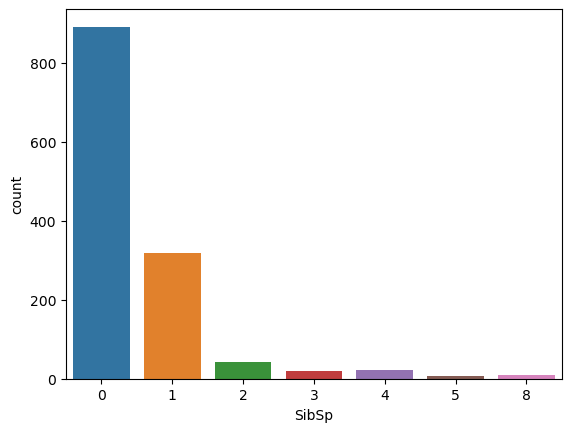

In [95]:
sns.countplot(data=df,x="SibSp")

<Axes: xlabel='Parch', ylabel='count'>

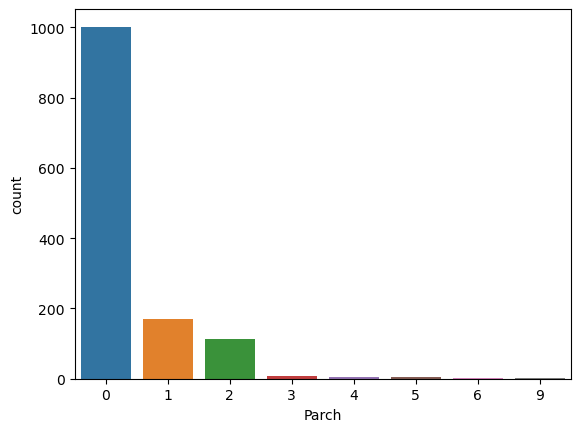

In [99]:
sns.countplot(data=df,x="Parch")

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

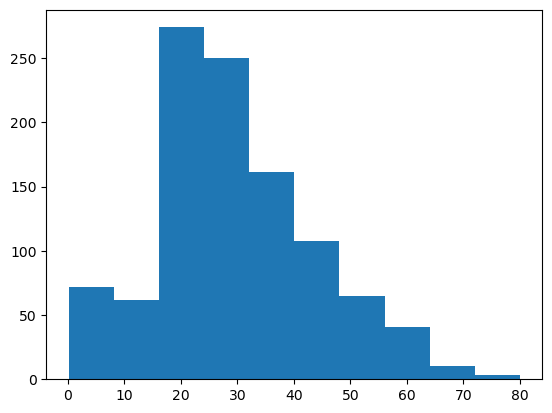

In [103]:
plt.hist(df['Age'])

In [105]:
df['Age'].mean()

29.881137667304014

In [107]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

(array([ 72.,  62., 274., 513., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

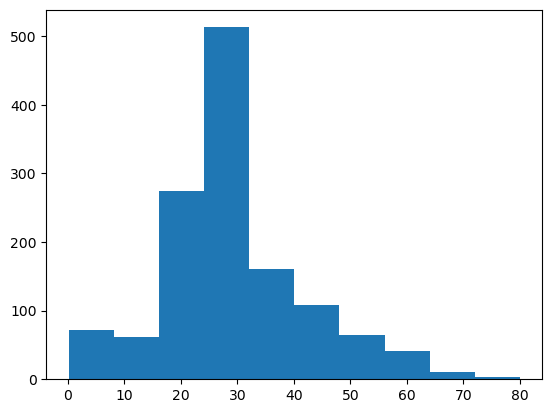

In [109]:
plt.hist(df['Age'])

In [111]:
prob_data

,Survived,Not Survived,Probability Rato
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000
